In [2]:
import pandas as pd
from pandas import DataFrame
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Connect to data base
import mysql.connector as mysql
from mysql.connector import Error
try:
    db = mysql.connect(
        host = "localhost",
        database='mestradoNOTA',
        user = "root",
        passwd = "admin123"
    )
    
    if db.is_connected():
        cursor = db.cursor(buffered=True)
#         cursor = db.cursor()
except Error as e:
    print("Error while connecting to MySQL", e)
    

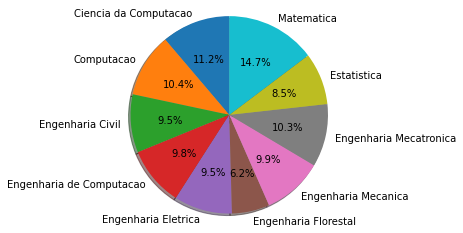

In [5]:
select_query = "select course, count(*) as COUNT from student_courses group by course;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = records['course']
sizes = records['COUNT']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

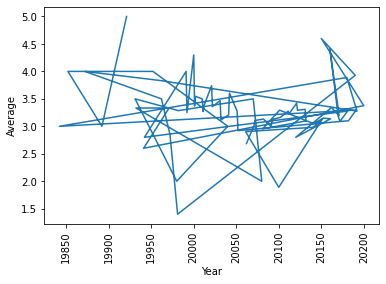

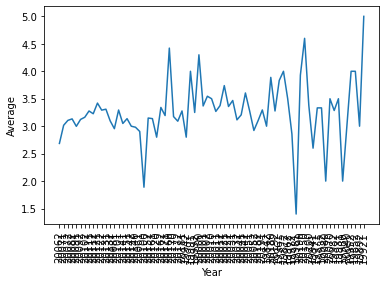

In [13]:
select_query = "select semester_year, AVG(average_in_semester) as average from student_course_subject group by semester_year;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

plt.plot(records['semester_year'], records['average'])
plt.xlabel('Year')
plt.ylabel('Average')
plt.xticks(rotation=90)

plt.show()

select_query="select semester_year, AVG(newScore) as average from (SELECT semester_year, score, CASE WHEN score = 'SS' THEN 5 WHEN score = 'MS' THEN 4 WHEN score = 'MM' THEN 3 WHEN score = 'MI' THEN 2 WHEN score = 'II' THEN 1 ELSE 0 END AS newScore FROM student_course_subject) as T1 group by semester_year;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

plt.plot(records['semester_year'], records['average'])
plt.xlabel('Year')
plt.ylabel('Average')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

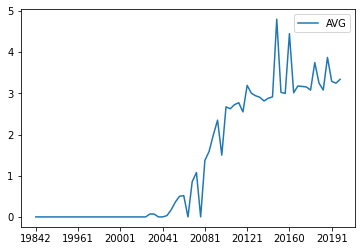

In [23]:
select_query = "select semester_year, AVG(average_in_semester) as average from student_course_subject group by semester_year;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names


records = records.sort_values(by=['semester_year'])

avg = pd.to_numeric(records['average'])
semester_year = records['semester_year'].tolist()


plotdata = pd.DataFrame({
    "AVG":avg.to_numpy()
    }, 
    index=semester_year
)

plotdata.plot()

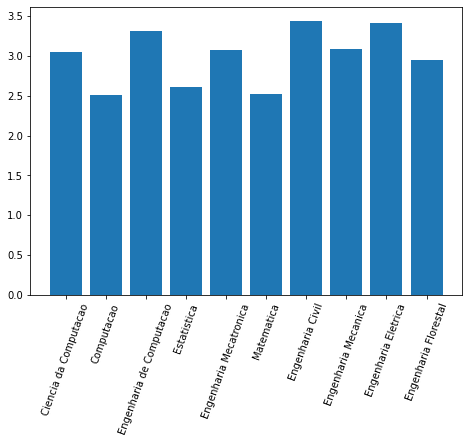

In [54]:
select_query = "select course, AVG(average_in_semester) as AVG from students as S INNER JOIN student_course_subject as SCS on S.id = SCS.id_student INNER JOIN student_courses as SC on SC.id_student = S.id group by course;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = records['course']
students = records['AVG']
ax.bar(langs,students)

plt.xticks(rotation=70)
plt.show()

<AxesSubplot:xlabel='course'>

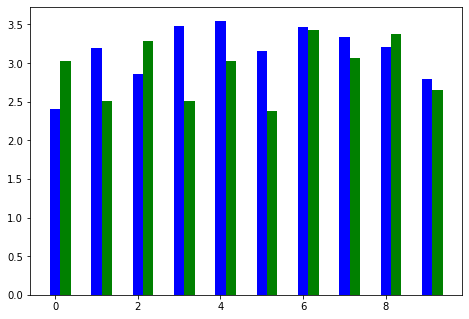

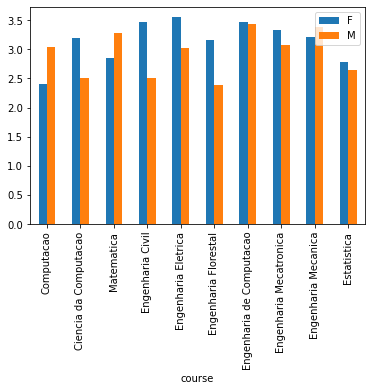

In [28]:
select_query = "select gender, course, AVG(average_in_semester) as AVG from students as S INNER JOIN student_course_subject as SCS on S.id = SCS.id_student INNER JOIN student_courses as SC on SC.id_student = S.id group by course, gender;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

F = records[records['gender'] == 'F']
M = records[records['gender'] == 'M']
X = np.arange(len(F['course']))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, F['AVG'], color = 'b', width = 0.25)
ax.bar(X + 0.25, M['AVG'], color = 'g', width = 0.25)

plotdata = pd.DataFrame({
    "F":F['AVG'].to_numpy(),
    "M":M['AVG'].to_numpy()
    }, 
    index=F['course']
)
plotdata.plot(kind="bar")

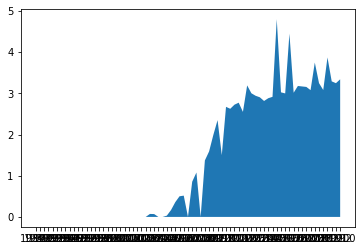

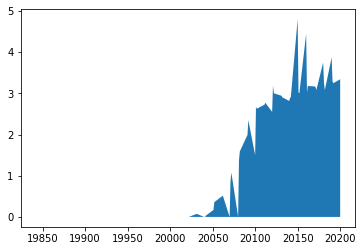

In [31]:
select_query = "select semester_year, AVG(average_in_semester) as average from student_course_subject group by semester_year;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names
records = records.sort_values(by=['semester_year'])
plt.fill_between(records['semester_year'], records['average'])
plt.show()

data = records['semester_year'].values.tolist()
dataInt = list(map(int, data))
plt.fill_between(dataInt, records['average'])
plt.show()

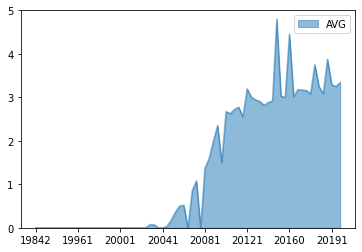

In [32]:
avg = pd.to_numeric(records['average'])
semester_year = records['semester_year'].tolist()

plotdata = pd.DataFrame({
    "AVG":avg.to_numpy()
    }, 
    index=semester_year
)

plotdata.plot.area(stacked=False, ylim=[0, 5]);

,semester_year,CIC,LIC,ERC,MEC,ES,EC
0,19842,0.000000,NaN,NaN,NaN,NaN,NaN
1,19852,NaN,0.000000,NaN,NaN,NaN,NaN
2,19872,0.000000,NaN,NaN,NaN,NaN,NaN
3,19892,NaN,NaN,0.000000,NaN,NaN,NaN
4,19921,NaN,NaN,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
68,20182,3.161411,2.827027,2.747368,2.669514,3.331564,3.128333
69,20190,3.975610,NaN,NaN,3.071429,4.163889,3.946429
70,20191,3.312480,3.143137,3.136364,3.028275,3.510502,3.422628
71,20192,3.332997,3.348571,2.728000,3.084097,3.377610,3.131268


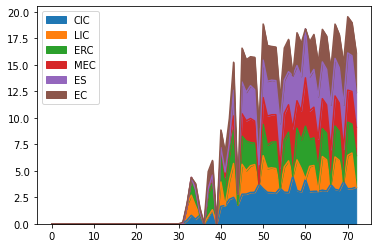

In [36]:
select_query = "select semester_year, course, AVG(average_in_semester) as average from student_course_subject as SCS INNER JOIN student_courses as SC on SCS.id_student = SC.id_student group by semester_year, course;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

records = records.sort_values(by=['semester_year'])


courses = records['course'].unique().tolist()

CIC = records[records['course'] == courses[0]]
LIC = records[records['course'] == courses[1]]
ERC = records[records['course'] == courses[2]]
MEC = records[records['course'] == courses[3]]
ES = records[records['course'] == courses[4]]
EC = records[records['course'] == courses[5]]

semester_year = records['semester_year'].unique().tolist()
dt = DataFrame()

dt['semester_year'] = semester_year
dt['CIC'] = np.nan
dt['LIC'] = np.nan
dt['ERC'] = np.nan
dt['MEC'] = np.nan
dt['ES'] = np.nan
dt['EC'] = np.nan

for i in dt['semester_year']:
    if(i in CIC['semester_year'].values):
        value = CIC.loc[CIC['semester_year'] == i, 'average']
        dt.loc[dt['semester_year'] == i, 'CIC'] = value.to_list()[0]
    if(i in LIC['semester_year'].values):
        value = LIC.loc[LIC['semester_year'] == i, 'average']
        dt.loc[dt['semester_year'] == i, 'LIC'] = value.to_list()[0]
    if(i in ERC['semester_year'].values):
        dt.loc[dt['semester_year'] == i, 'ERC'] = ERC.loc[ERC['semester_year'] == i, 'average'].to_list()[0]
    if(i in MEC['semester_year'].values):
        dt.loc[dt['semester_year'] == i, 'MEC'] = MEC.loc[MEC['semester_year'] == i, 'average'].to_list()[0]
    if(i in ES['semester_year'].values):
        dt.loc[dt['semester_year'] == i, 'ES'] = ES.loc[ES['semester_year'] == i, 'average'].to_list()[0]
    if(i in EC['semester_year'].values):
        dt.loc[dt['semester_year'] == i, 'EC'] = EC.loc[EC['semester_year'] == i, 'average'].to_list()[0]

        
ax = dt.plot.area()
dt

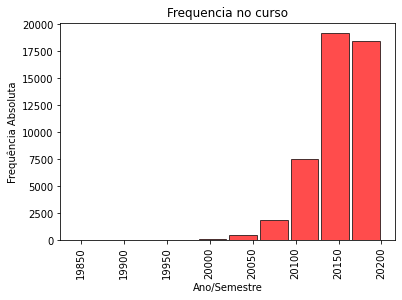

In [39]:
select_query = "select semester_year from student_course_subject;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

data = records['semester_year'].values.tolist()
dataInt = list(map(int, data))


plt.title('Frequencia no curso')
plt.xlabel('Ano/Semestre')
plt.ylabel('Frequência Absoluta')
# plt.tick_params(labelsize=15)
# plt.gcf().set_size_inches(20, 18)
plt.xticks(rotation=90)
plt.hist(dataInt, rwidth=0.9, color='red', alpha=0.7, edgecolor='black')
plt.show()

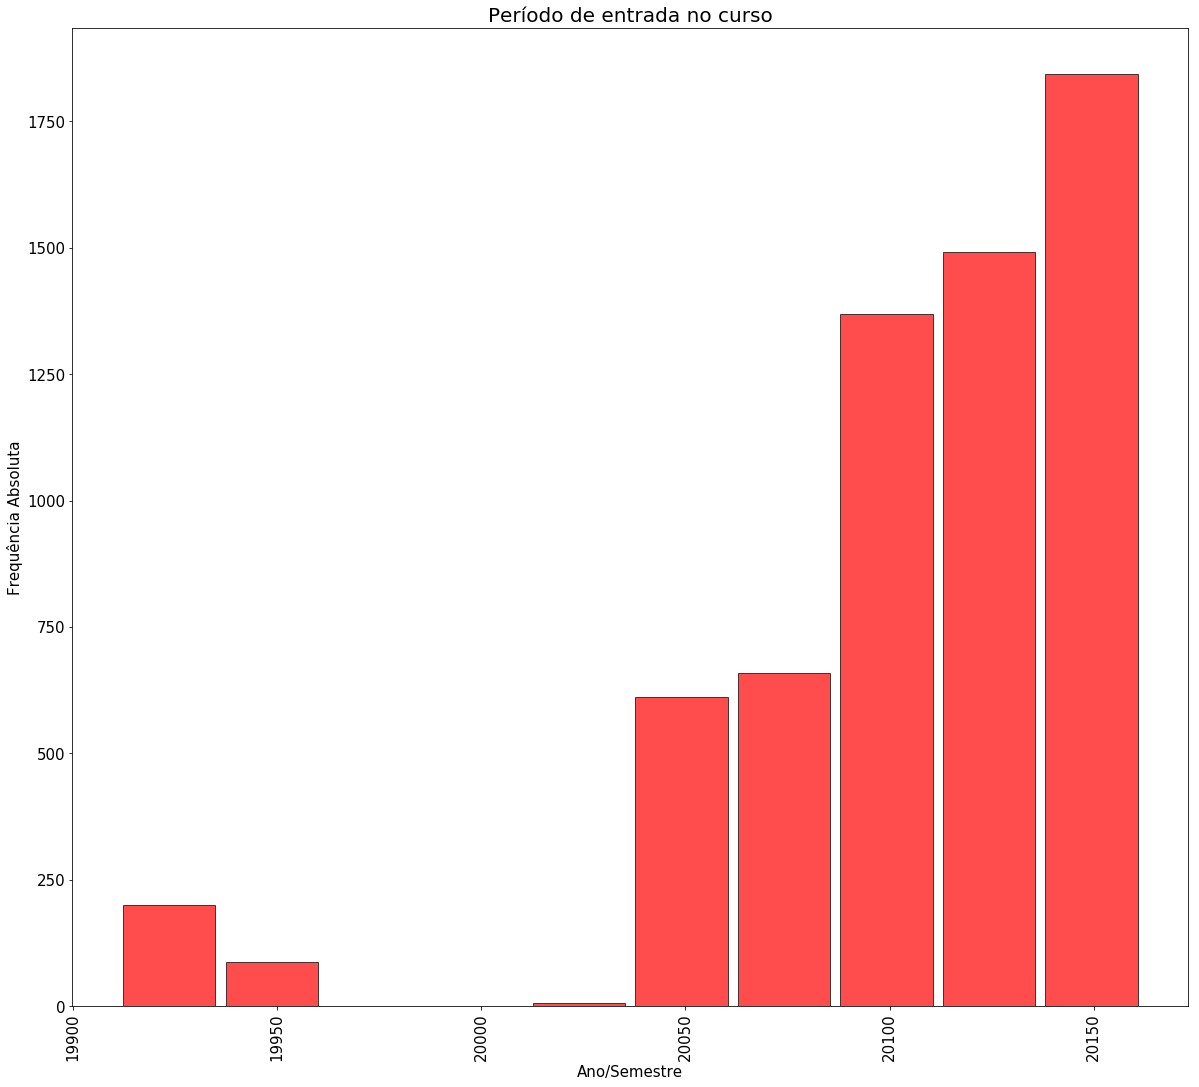

<Figure size 7200x1296 with 0 Axes>

In [10]:
select_query = "select option_entrance_period from student_courses;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

data = records['option_entrance_period'].values.tolist()
dataInt = list(map(int, data))


plt.title('Período de entrada no curso', fontsize=20)
plt.xlabel('Ano/Semestre', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.gcf().set_size_inches(20, 18)
plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.hist(dataInt, rwidth=0.9, color='red', alpha=0.7, edgecolor='black')
plt.figure(figsize=(100, 18))
plt.show()

# plt.plot(dates, values)


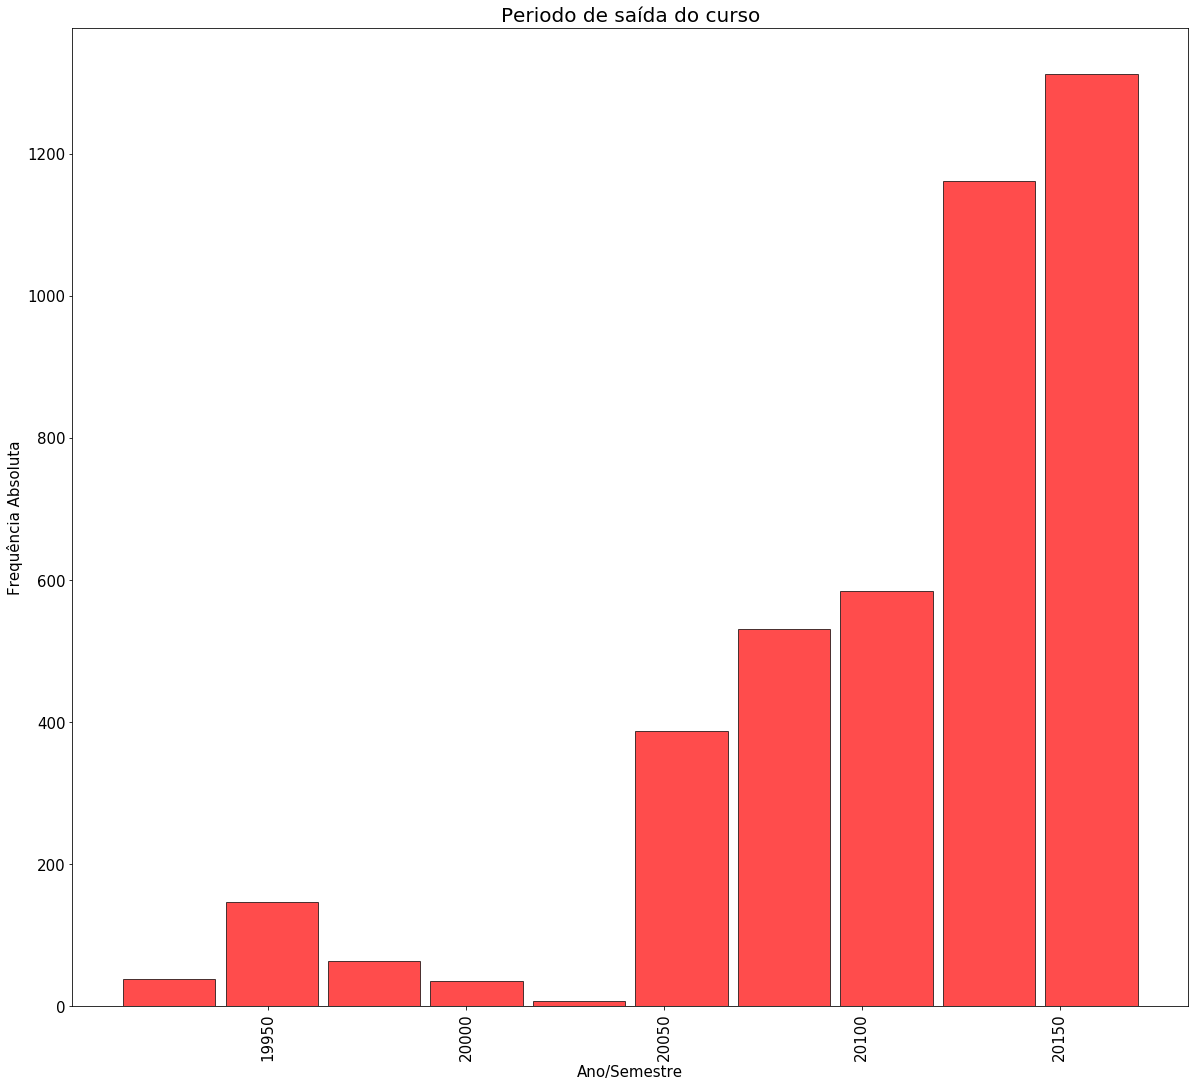

In [11]:
select_query = "select leaving_period from student_courses;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

data = records['leaving_period'].values.tolist()
data = list(filter(lambda a: a != '0', data))
dataInt = list(map(int, data))


plt.title('Periodo de saída do curso', fontsize=20)
plt.xlabel('Ano/Semestre', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.tick_params(labelsize=15)
plt.gcf().set_size_inches(20, 18)
plt.xticks(rotation=90)
plt.hist(dataInt, rwidth=0.9, color='red', alpha=0.7, edgecolor='black')
plt.show()

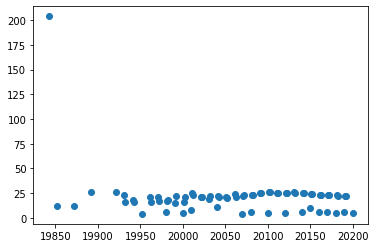

In [41]:
select_query = "select semester_year, AVG(total_credits_semester) as SUM from student_course_subject group by semester_year;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

x=records['semester_year'].values.tolist()
xInt = list(map(int, x))
y=records['SUM'].values.tolist()

plt.scatter(xInt, y)
# plt.gcf().set_size_inches(20, 18)
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Ciencia da Computacao'),
  Text(2, 0, 'Computacao'),
  Text(3, 0, 'Engenharia Civil'),
  Text(4, 0, 'Engenharia Eletrica'),
  Text(5, 0, 'Engenharia Florestal'),
  Text(6, 0, 'Engenharia Mecanica'),
  Text(7, 0, 'Engenharia Mecatronica'),
  Text(8, 0, 'Engenharia de Computacao'),
  Text(9, 0, 'Estatistica'),
  Text(10, 0, 'Matematica')])

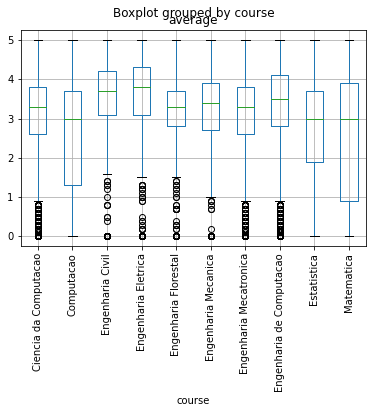

In [44]:
select_query = "select average_in_semester, course from student_courses as SC INNER JOIN student_course_subject as SCS on SC.id_student = SCS.id_student;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall(), columns = ['average', 'course'])

records['average'] = records['average'].astype(float)
boxplot = records.boxplot(column=['average'], by="course")
plt.xticks(rotation=90)

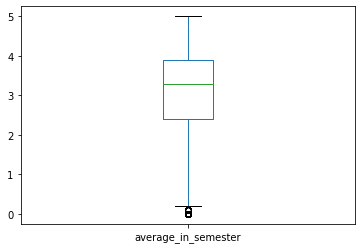

In [50]:
select_query = "select average_in_semester from student_course_subject as SCS INNER JOIN subjects as S ON S.id = SCS.id_subject"
cursor.execute(select_query)
records = pd.DataFrame(cursor.fetchall())
records.columns = cursor.column_names

records['average_in_semester'] = list(map(float, records['average_in_semester']))

records.plot.box();
# dataInt

In [ ]:
boxplot = records.boxplot(column=['average'], figsize=(20, 18))

In [ ]:
select semester_year, AVG(newScore) as average from 
    (SELECT semester_year, score, 
         CASE 
         WHEN score = 'SS' THEN 5 
         WHEN score = 'MS' THEN 4 
         WHEN score = 'MM' THEN 3 
         WHEN score = 'MI' THEN 2 
         WHEN score = 'II' THEN 1 
         ELSE 0 
         END AS newScore 
     FROM student_course_subject) as T1 
    group by semester_year;

In [ ]:
select 
    CASE
    WHEN race = 'Nao cadastrada' THEN 'Nao informado' 
    WHEN race = 'Nao dispe da informao' THEN 'Nao informado' 
    ELSE race 
    END as newRace, count(*) from students group by newrace;
